In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [223]:
df=pd.read_csv('churn.csv')


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Data Preparation

In [4]:
df.columns=df.columns.str.lower()

In [5]:
categorical_col=list(df.dtypes[df.dtypes=='object'].index)
categorical_col

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [6]:
for c in categorical_col:
    df[c]=df[c].str.lower().str.replace(' ','_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
tc=pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [12]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [13]:
df.totalcharges=df.totalcharges.fillna(0)

In [14]:
df.totalcharges.isnull().sum()

0

In [15]:

df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [16]:
df.churn=(df.churn=='yes').astype(int)

## Setting up vaidation data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test=train_test_split(df, test_size=0.2, random_state=1)

In [19]:
df_train, df_val=train_test_split(df_full_train, test_size=0.25, random_state=42)

In [20]:
len(df_train),len(df_test),len(df_val)

(4225, 1409, 1409)

In [21]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [22]:
df_full_train=df_full_train.reset_index(drop=True)

In [23]:
y_train=df_train.churn.values
y_test=df_test.churn.values
y_val=df_val.churn.values

In [24]:
del df_train['churn']

In [25]:
del df_val['churn']

In [26]:
del df_test['churn']

In [27]:
cat=df.dtypes[df.dtypes=='object']
cat

customerid          object
gender              object
partner             object
dependents          object
phoneservice        object
multiplelines       object
internetservice     object
onlinesecurity      object
onlinebackup        object
deviceprotection    object
techsupport         object
streamingtv         object
streamingmovies     object
contract            object
paperlessbilling    object
paymentmethod       object
dtype: object

In [28]:
catgorical=['customerid','gender','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity',
            'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract',
            'paperlessbilling','paymentmethod']

In [29]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


## Explanatory Data analysis

In [30]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [31]:
numerical=['monthlycharges', 'totalcharges','tenure']

In [32]:
categorical=['gender','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity',
            'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract',
            'paperlessbilling','paymentmethod']

In [33]:
df_full_train[catgorical].nunique()

customerid          5634
gender                 2
partner                2
dependents             2
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
dtype: int64

## FEature importanmce still EDA

In [34]:
global_churn=df.churn.mean()

In [35]:
df_full_train[df_full_train.gender=='male'].churn.mean()

0.2632135306553911

In [36]:
df_full_train[df_full_train.gender=='female'].churn.mean()

0.27682403433476394

In [37]:
## wecan see that the churn rate relating to gender is or no much difference

In [38]:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [39]:
churn_no_partner=df_full_train[df_full_train.partner=='no'].churn.mean()
churn_no_partner

0.3298090040927694

In [40]:
churn_partner=df_full_train[df_full_train.partner=='yes'].churn.mean()
churn_partner

0.20503330866025166

In [41]:
global_churn-churn_partner

0.06033656213344424

In [42]:
global_churn-churn_no_partner

-0.06443913329907353

### 1 if global churn rate - group churn rate is 
### <0 then the are more likely to churn
### >0 less likely to churn

In [43]:
global_churn/churn_partner

1.294276878853008

In [44]:
global_churn/churn_no_partner

0.8046168160983623

## Risk ratio
### 1 if group churn rate / global churn rate is 
### >1 then the are more likely to churn
### <1 less likely to churn

In [45]:
from IPython.display import display

In [46]:
#calculating risk for al categorical variable

for c in categorical:
    df_group=df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff']=df_group['mean']-global_churn
    df_group['risk']=df_group['mean']/global_churn
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.011454,1.043163
male,0.263214,2838,-0.002156,0.991874


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.064439,1.242828
yes,0.205033,2702,-0.060337,0.772632


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.048390,1.182350
yes,0.165666,1666,-0.099704,0.624284


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.024054,0.909358
yes,0.273049,5087,0.007679,1.028937


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.007962,0.969995
no_phone_service,0.241316,547,-0.024054,0.909358
yes,0.290742,2387,0.025372,1.095609


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.073022,0.724828
fiber_optic,0.425171,2479,0.159802,1.602184
no,0.077805,1221,-0.187565,0.293195


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.155551,1.586168
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.153226,1612,-0.112144,0.577405


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.138954,1.523622
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.217232,1915,-0.048137,0.818602


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.130506,1.491787
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.230412,1940,-0.034957,0.868269


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.153544,1.578604
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.159926,1632,-0.105443,0.602655


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.077462,1.291901
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.302723,2167,0.037353,1.140757


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.073537,1.277110
no_internet_service,0.077805,1221,-0.187565,0.293195
yes,0.307273,2200,0.041903,1.157904


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.166331,1.626790
one_year,0.120573,1186,-0.144797,0.454360
two_year,0.028274,1344,-0.237096,0.106545


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.093299,0.648419
yes,0.338151,3321,0.072781,1.274264


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.097199,0.633722
credit_card_(automatic),0.164339,1217,-0.101031,0.619281
electronic_check,0.455890,1893,0.190520,1.717942
mailed_check,0.193870,1305,-0.071500,0.730564


## Feature importance  of categorical variables Mutual Information

In [47]:
from sklearn.metrics import mutual_info_score

In [48]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train['churn'])

In [49]:
mi=df_full_train[categorical].apply(mutual_info_churn_score)

In [50]:
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance of numerical variables by corelation coefficient

In [51]:
df_full_train[numerical].corr

<bound method DataFrame.corr of       monthlycharges  totalcharges  tenure
0              19.70        258.35      12
1              73.90       3160.55      42
2              65.15       4681.75      71
3              85.45       6300.85      71
4              70.40       2044.75      30
...              ...           ...     ...
5629          100.50        918.60       9
5630           19.95       1189.90      60
5631          105.70       2979.50      28
5632           54.40        114.10       2
5633           68.25       1114.85      16

[5634 rows x 3 columns]>

In [52]:
df_full_train[numerical].corrwith(df_full_train.churn)

monthlycharges    0.196805
totalcharges     -0.196353
tenure           -0.351885
dtype: float64

In [53]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

monthlycharges    0.196805
totalcharges      0.196353
tenure            0.351885
dtype: float64

higher monthly charges -- increases churn rate
tenure increase ---- less churn rate

In [54]:
df_full_train[df_full_train['tenure']>12].churn.mean()

0.17634908339788277

In [55]:
df_full_train[df_full_train['tenure']<12].churn.mean()

0.48383233532934133

In [56]:
df_full_train[df_full_train['monthlycharges']<=20].churn.mean()

0.08795411089866156

In [57]:
df_full_train[(df_full_train['monthlycharges']>20)&(df_full_train['monthlycharges']<=50)].churn.mean()

0.18340943683409436

In [58]:
df_full_train[df_full_train['monthlycharges']>=50].churn.mean()

0.3248223216635957

In [59]:
# as Tenure decreases churn rate increases (negative correlation)
# as monthly charge increases churn rate increases(positive correlation)

## One-hot Encoding

In [60]:
from sklearn.feature_extraction import DictVectorizer

In [61]:
dicts=df_train[['gender','contract','tenure']].iloc[:100].to_dict(orient='record')
dicts

[{'gender': 'female', 'contract': 'month-to-month', 'tenure': 52},
 {'gender': 'male', 'contract': 'two_year', 'tenure': 69},
 {'gender': 'female', 'contract': 'one_year', 'tenure': 56},
 {'gender': 'male', 'contract': 'one_year', 'tenure': 45},
 {'gender': 'female', 'contract': 'one_year', 'tenure': 37},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 48},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 9},
 {'gender': 'female', 'contract': 'one_year', 'tenure': 4},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 4},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 35},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 45},
 {'gender': 'female', 'contract': 'month-to-month', 'tenure': 1},
 {'gender': 'female', 'contract': 'two_year', 'tenure': 18},
 {'gender': 'female', 'contract': 'one_year', 'tenure': 61},
 {'gender': 'male', 'contract': 'two_year', 'tenure': 72},
 {'gender': 'male', 'contract': 'month-to-month', 'tenure': 20},
 {'gen

In [62]:
dv=DictVectorizer(sparse=False)

In [63]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [64]:
dv.transform(dicts)

array([[ 1.,  0.,  0.,  1.,  0., 52.],
       [ 0.,  0.,  1.,  0.,  1., 69.],
       [ 0.,  1.,  0.,  1.,  0., 56.],
       [ 0.,  1.,  0.,  0.,  1., 45.],
       [ 0.,  1.,  0.,  1.,  0., 37.],
       [ 0.,  0.,  1.,  1.,  0., 48.],
       [ 0.,  0.,  1.,  1.,  0.,  9.],
       [ 0.,  1.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  1.,  0., 35.],
       [ 0.,  0.,  1.,  1.,  0., 45.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 0.,  1.,  0.,  1.,  0., 61.],
       [ 0.,  0.,  1.,  0.,  1., 72.],
       [ 1.,  0.,  0.,  0.,  1., 20.],
       [ 0.,  1.,  0.,  1.,  0., 69.],
       [ 0.,  0.,  1.,  0.,  1., 72.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  1., 31.],
       [ 1.,  0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 0.,  1.,  0.,  1.,  0., 46.],
       [ 0.,  0.,  1.,  1.,  0., 50.],
       [ 0.,  1.,  0.,  1.,  0., 58.],
       [ 0.,  1.,  0.,  1

In [65]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [66]:
numerical


['monthlycharges', 'totalcharges', 'tenure']

In [67]:
train_dicts=df_train[categorical+numerical].to_dict(orient='record')
dv=DictVectorizer(sparse=False)
dv.fit(train_dicts)
x_train=dv.transform(train_dicts)

In [68]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_service',
 'streamingtv=

In [69]:
x_train[0]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 9.8150e+01, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 5.2000e+01, 4.9934e+03])

In [70]:
x_train.shape


(4225, 44)

In [71]:
val_dicts=df_val[categorical+numerical].to_dict(orient='record')
x_val=dv.transform(val_dicts)
x_val[0]

array([  0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   0.  ,   1.  ,  19.7 ,   1.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         1.  ,   0.  ,  14.  , 263.65])

## Logistics Regression


In [72]:
#ogistics regressionsolves binary problem, betwen 1/0 or yes orno positive or negative, spamor no spam
#g(xi)--0_1

# this is very similar to linear regresson only that it uses asigmoid to convert any number in to a number betwen -0 to 1

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [75]:
#toget our bycharm (W0)which is our prediction when we do not know anythingabout our target variables
model.intercept_[0]

-0.15779041191407742

In [76]:
#now these are arederived weights after fitting(W)
model.coef_[0].round(3)

array([ 0.511, -0.099, -0.569, -0.001, -0.157,  0.075, -0.124, -0.109,
       -0.028, -0.13 , -0.382,  0.348, -0.124,  0.006, -0.224,  0.086,
       -0.02 ,  0.084, -0.124, -0.118,  0.149, -0.124, -0.183, -0.264,
        0.106, -0.09 , -0.068, -0.087, -0.158,  0.224, -0.137,  0.086,
       -0.244, -0.107, -0.124,  0.073, -0.086, -0.124,  0.052,  0.163,
       -0.124, -0.197, -0.06 ,  0.   ])

In [77]:
#hard prediction,this gives us the exact prediction we have in our y train
# but not what we reay need
model.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
#to earn the probability
x_pred=model.predict_proba(x_train)[:,1]
#first col: probabiity of being negative
#second col: the probabilty of beonging to the positve class i.e churning
#we areony concerned on th scond col

In [79]:
y_pred_for_val=model.predict_proba(x_val)[:,1]
y_pred_for_val

array([0.04765864, 0.29730575, 0.01425346, ..., 0.1517848 , 0.1740247 ,
       0.01902554])

In [80]:
churn_des=y_pred_for_val>=0.5

In [81]:
churn_des

array([False, False, False, ..., False, False, False])

In [82]:
df_val[churn_des]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
5,0928-jmxnp,male,1,yes,no,4,no,no_phone_service,dsl,no,no,yes,no,no,no,month-to-month,yes,electronic_check,29.90,118.25
6,6198-zfioj,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.60,402.50
15,1792-uxafy,female,1,no,no,17,yes,no,fiber_optic,no,yes,yes,no,yes,no,month-to-month,yes,electronic_check,89.15,1496.90
17,3334-cthol,female,0,no,no,1,yes,yes,dsl,no,no,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),49.95,49.95
20,7439-dkztw,male,0,no,no,1,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.55,80.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1392,3199-xgzcy,female,0,no,no,8,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,75.25,576.70
1396,6357-jjpqt,female,0,no,no,3,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.50,232.35
1397,4998-ikfse,female,0,no,no,30,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,no,electronic_check,100.45,3096.90


In [83]:
#geting the cus id of churners

In [84]:
df_val[churn_des][['contract','customerid']]

,contract,customerid
5,month-to-month,0928-jmxnp
6,month-to-month,6198-zfioj
15,month-to-month,1792-uxafy
17,month-to-month,3334-cthol
20,month-to-month,7439-dkztw
...,...,...
1389,month-to-month,2034-cgrhz
1392,month-to-month,3199-xgzcy
1396,month-to-month,6357-jjpqt
1397,month-to-month,4998-ikfse


In [85]:
#checking the accuracy of our model

In [86]:
churn_des.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
y_val

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
(churn_des.astype(int)==y_val).mean()

0.7849538679914834

In [89]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred_for_val
df_pred['prediction'] = churn_des.astype(int)
df_pred['actual'] = y_val

In [90]:
df_pred['final']=df_pred['prediction']==df_pred['actual']

In [91]:
df_pred

,probability,prediction,actual,final
0,0.047659,0,0,True
1,0.297306,0,0,True
2,0.014253,0,0,True
3,0.442512,0,1,False
4,0.063930,0,0,True
...,...,...,...,...
1404,0.069644,0,0,True
1405,0.015731,0,0,True
1406,0.151785,0,0,True
1407,0.174025,0,0,True


In [92]:
df_pred.final.mean()

0.7849538679914834

## MOdel intrepretattion

In [93]:
a=dv.get_feature_names()

In [94]:
b=model.coef_[0].round(3)

In [95]:
dict(zip(a,b))

{'contract=month-to-month': 0.511,
 'contract=one_year': -0.099,
 'contract=two_year': -0.569,
 'dependents=no': -0.001,
 'dependents=yes': -0.157,
 'deviceprotection=no': 0.075,
 'deviceprotection=no_internet_service': -0.124,
 'deviceprotection=yes': -0.109,
 'gender=female': -0.028,
 'gender=male': -0.13,
 'internetservice=dsl': -0.382,
 'internetservice=fiber_optic': 0.348,
 'internetservice=no': -0.124,
 'monthlycharges': 0.006,
 'multiplelines=no': -0.224,
 'multiplelines=no_phone_service': 0.086,
 'multiplelines=yes': -0.02,
 'onlinebackup=no': 0.084,
 'onlinebackup=no_internet_service': -0.124,
 'onlinebackup=yes': -0.118,
 'onlinesecurity=no': 0.149,
 'onlinesecurity=no_internet_service': -0.124,
 'onlinesecurity=yes': -0.183,
 'paperlessbilling=no': -0.264,
 'paperlessbilling=yes': 0.106,
 'partner=no': -0.09,
 'partner=yes': -0.068,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.158,
 'paymentmethod=electronic_check': 0.224,


In [96]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [97]:
y_full_train=df_full_train['churn']
y_full_train

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int32

In [98]:
#del df_full_train['churn']

In [99]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [100]:
full_train_dicts=df_full_train[categorical+numerical].to_dict(orient='record')
dv=DictVectorizer(sparse=False)
dv.fit(full_train_dicts)
x_full_train=dv.transform(full_train_dicts)
x_full_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [101]:
model=LogisticRegression(solver='liblinear')
model.fit(x_full_train,y_full_train)
model

LogisticRegression(solver='liblinear')

In [102]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
x_test = dv.transform(dicts_test)

In [103]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [104]:
y_pred_for_test = model.predict_proba(x_test)[:, 1]
y_pred_for_test

array([0.06281244, 0.10334415, 0.33781357, ..., 0.00681239, 0.18047349,
       0.64380564])

In [105]:
test_churn_des=(y_pred_for_test>=0.5).astype(int)

In [106]:
(test_churn_des==y_test).mean()

0.8090844570617459

## using our model

In [107]:
dicts_test[10]

{'gender': 'male',
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 93.95,
 'totalcharges': 2861.45,
 'tenure': 32}

In [108]:
custormer1_dict=dicts_test[10]

In [109]:
x_cust=dv.transform([custormer1_dict])
x_cust.shape

(1, 44)

In [110]:
model.predict_proba(x_cust)[:,1]

array([0.44404231])

In [111]:
y_test[10]

0

# Week 4

## ACcuracy model

In [112]:
#so we fix somethresholds, threshold is just that mid point that classifies values as churn or no churn
thresholds = np.linspace(0,1,12)
thresholds

scores=[]

for t in thresholds:
    test_churn_des=(y_pred_for_test>=t)
    score=(test_churn_des==y_test).mean()
    print(t,score)
    scores.append(score)
scores

0.0 0.24698367636621718
0.09090909090909091 0.5933286018452804
0.18181818181818182 0.6955287437899219
0.2727272727272727 0.7530163236337828
0.36363636363636365 0.7792760823278921
0.4545454545454546 0.8048261178140526
0.5454545454545454 0.8197303051809794
0.6363636363636364 0.8062455642299503
0.7272727272727273 0.7799858055358411
0.8181818181818182 0.7544357700496807
0.9090909090909092 0.7530163236337828
1.0 0.7530163236337828


[0.24698367636621718,
 0.5933286018452804,
 0.6955287437899219,
 0.7530163236337828,
 0.7792760823278921,
 0.8048261178140526,
 0.8197303051809794,
 0.8062455642299503,
 0.7799858055358411,
 0.7544357700496807,
 0.7530163236337828,
 0.7530163236337828]

In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(y_test,y_pred_for_test>=0.5)

0.8090844570617459

In [115]:
# true positive (g(xi)>=t &y=1)will churn and they did churn
# false positive (g(xi)>= &y=0) will churn and did not churn


#true negatibve (g(xi)<t &y=0) will not churn and did not churn
#false negative (g(xi)<t &y=1) will not churn but churn

In [116]:
actual_positive=(y_val==1)
actual_negative=(y_val==0)

In [117]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

# Confusion matrix

In [118]:
#remember we used 0.5 during our probability, so this remains our threshold for the predictions we got
t=0.5
predictive_positive=(y_pred_for_val>=t)
predictive_negative=(y_pred_for_val<t)
predictive_negative

array([ True,  True,  True, ...,  True,  True,  True])

In [119]:
#predictive positives are predictions for churns
#predictive negatives are predictions for non churn
tp=(predictive_positive&actual_positive).sum()
tn=(predictive_negative&actual_negative).sum()

In [120]:
fn=(predictive_negative&actual_positive).sum()
fp=(predictive_positive&actual_negative).sum()

In [121]:
tp,tn,fp,fn

(188, 918, 124, 179)

In [122]:
confusion_matrix=np.array([
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[918, 124],
       [179, 188]])

In [123]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.09],
       [0.13, 0.13]])

## precison

In [124]:
#precisionis the fraction of correct positive predicyton
#hence these are the people we sent the promotion mail
# we man the tpand the fp
prec=tp/(tp+fp)
prec,1-prec

(0.6025641025641025, 0.39743589743589747)

In [125]:
# here we over see churner, out of all the churners we saw and sent promotion mail only 60% were actually churning and over 
#30% were not

In [126]:
# hence
#0ver 30% did not need it which is 124pple, but we sent to 312, only 188 needed it
tp+fp

312

In [127]:
312-188

124

## recal

In [128]:
#recall=fraction of churning users we corectly identified
#here we mean Tp and Fn
#a that churned

In [129]:
recall=tp/(tp+fn)
1-recall,recall

(0.4877384196185286, 0.5122615803814714)

In [130]:
# we were only able to identify 51 % of churner and could nopt identify the remaining over 40 % of churners,that is we found
#188 out of 367 churners and now they aff gone

In [131]:
tp+fn

367

In [132]:
tp

188

In [133]:
#hence our accuracy is not trustworthy

# ROC recivers operating characteristics

In [134]:
confusion_matrix=np.array([
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[918, 124],
       [179, 188]])

In [135]:
#false positive rate is th fraction of falsae positive amongst all negative examples
fpr=fp/(tn+fp)
fpr

0.11900191938579655

In [136]:
#false positive rate is the fraction of true positive amongst all positive examples
#tpr is the same as recall
tpr=tp/(tp+fn)
tpr

0.5122615803814714

In [137]:
thresholds=(np.linspace(0,1,124)).round(2)
thresholds

array([0.  , 0.01, 0.02, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.07, 0.08,
       0.09, 0.1 , 0.11, 0.11, 0.12, 0.13, 0.14, 0.15, 0.15, 0.16, 0.17,
       0.18, 0.19, 0.2 , 0.2 , 0.21, 0.22, 0.23, 0.24, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.33, 0.34, 0.35,
       0.36, 0.37, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.63, 0.64, 0.65, 0.66, 0.67, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.72, 0.73, 0.74, 0.75, 0.76, 0.76, 0.77, 0.78, 0.79, 0.8 ,
       0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.85, 0.86, 0.87, 0.88, 0.89,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.98, 0.99, 1.  ])

In [138]:
scores=[]
for t in thresholds:
    predictive_positive=(y_pred_for_val>=t)
    predictive_negative=(y_pred_for_val<t)

    tp=(predictive_positive&actual_positive).sum()
    tn=(predictive_negative&actual_negative).sum()
    fn=(actual_positive&predictive_negative).sum()
    fp=(actual_negative&predictive_positive).sum()
    scores.append((t,tp,tn,fn,fp))

scores
col=('threshold','true_positive','true_negative','false_negative','false_positive')
df=pd.DataFrame(scores, columns=col)

In [139]:
df

,threshold,true_positive,true_negative,false_negative,false_positive
0,0.00,367,0,0,1042
1,0.01,365,109,2,933
2,0.02,364,204,3,838
3,0.02,364,204,3,838
4,0.03,363,268,4,774
...,...,...,...,...,...
119,0.97,0,1042,367,0
120,0.98,0,1042,367,0
121,0.98,0,1042,367,0
122,0.99,0,1042,367,0


In [140]:
df[::10]

,threshold,true_positive,true_negative,false_negative,false_positive
0,0.00,367,0,0,1042
10,0.08,356,449,11,593
20,0.16,330,590,37,452
30,0.24,295,712,72,330
40,0.33,260,806,107,236
50,0.41,233,855,134,187
60,0.49,191,913,176,129
70,0.57,150,947,217,95
80,0.65,106,994,261,48
90,0.73,51,1019,316,23


In [141]:
df['tpr']=df.true_positive/(df.true_positive+df.false_negative)

In [142]:
df['fpr']=df.false_positive/(df.true_negative+df.false_positive)

In [143]:
df[::10]

,threshold,true_positive,true_negative,false_negative,false_positive,tpr,fpr
0,0.00,367,0,0,1042,1.000000,1.000000
10,0.08,356,449,11,593,0.970027,0.569098
20,0.16,330,590,37,452,0.899183,0.433781
30,0.24,295,712,72,330,0.803815,0.316699
40,0.33,260,806,107,236,0.708447,0.226488
50,0.41,233,855,134,187,0.634877,0.179463
60,0.49,191,913,176,129,0.520436,0.123800
70,0.57,150,947,217,95,0.408719,0.091171
80,0.65,106,994,261,48,0.288828,0.046065
90,0.73,51,1019,316,23,0.138965,0.022073


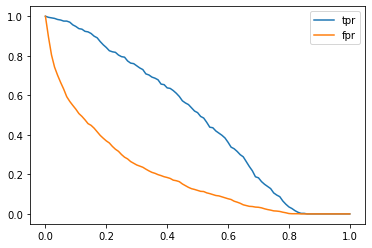

In [144]:
plt.plot(df.threshold,df['tpr'],label='tpr'),
plt.plot(df.threshold,df['fpr'],label='fpr')
plt.legend()

#we want to adjust the graph, bringit very closer to the base line of the graph
#that is reduce the false positive rate, those we said would churn and did not churn and increasse 
#the true negative rate, the once we said would churn and they did

In [145]:
def tpr_fpr_dataframe(y_val,y_pred):
    scores=[]
    thresholds=(np.linspace(0,1,124)).round(2)
    for t in thresholds:
        actual_positive=(y_val==1)
        actual_negative=(y_val==0)

        predictive_positive=(y_pred_for_val>=t)
        predictive_negative=(y_pred_for_val<t)

        tp=(predictive_positive&actual_positive).sum()
        tn=(predictive_negative&actual_negative).sum()
        fn=(actual_positive&predictive_negative).sum()
        fp=(actual_negative&predictive_positive).sum()


        scores.append((t,tp,tn,fn,fp))



col=('threshold','true_positive','true_negative','false_negative','false_positive')
df=pd.DataFrame(scores, columns=col)
df['tpr']=df.true_positive/(df.true_positive+df.false_negative)    
df['fpr']=df.false_positive/(df.true_negative+df.false_positive)
df

,threshold,true_positive,true_negative,false_negative,false_positive,tpr,fpr
0,0.00,367,0,0,1042,1.000000,1.000000
1,0.01,365,109,2,933,0.994550,0.895393
2,0.02,364,204,3,838,0.991826,0.804223
3,0.02,364,204,3,838,0.991826,0.804223
4,0.03,363,268,4,774,0.989101,0.742802
...,...,...,...,...,...,...,...
119,0.97,0,1042,367,0,0.000000,0.000000
120,0.98,0,1042,367,0,0.000000,0.000000
121,0.98,0,1042,367,0,0.000000,0.000000
122,0.99,0,1042,367,0,0.000000,0.000000


# random model

In [146]:
np.random.seed(1)
y_rand=np.random.uniform(0,1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [147]:
((y_rand>=0.5)==y_val).mean()

0.5081618168914124

In [148]:
df

,threshold,true_positive,true_negative,false_negative,false_positive,tpr,fpr
0,0.00,367,0,0,1042,1.000000,1.000000
1,0.01,365,109,2,933,0.994550,0.895393
2,0.02,364,204,3,838,0.991826,0.804223
3,0.02,364,204,3,838,0.991826,0.804223
4,0.03,363,268,4,774,0.989101,0.742802
...,...,...,...,...,...,...,...
119,0.97,0,1042,367,0,0.000000,0.000000
120,0.98,0,1042,367,0,0.000000,0.000000
121,0.98,0,1042,367,0,0.000000,0.000000
122,0.99,0,1042,367,0,0.000000,0.000000


In [149]:
def tpr_fpr_dataframe(y_val,y_pred):
    
    scores=[]
    
    thresholds=(np.linspace(0,1,124)).round(2)
    
    for t in thresholds:
        actual_positive=(y_val==1)
        actual_negative=(y_val==0)

        predictive_positive=(y_pred>=t)
        predictive_negative=(y_pred<t)

        tp=(predictive_positive&actual_positive).sum()
        tn=(predictive_negative&actual_negative).sum()
        fn=(predictive_negative&actual_positive).sum()
        fp=(predictive_positive&actual_negative).sum()


        scores.append((t,tp,tn,fn,fp))



    col=('threshold','tp','tn','fn','fp')
    df1=pd.DataFrame(scores, columns=col)
    
    df1['tpr']=df1.tp/(df1.tp+df1.fn)    
    df1['fpr']=df1.fp/(df1.tn+df1.fp)
    
    return df1

In [150]:
df_rand=tpr_fpr_dataframe(y_val,y_rand)
df_rand

,threshold,tp,tn,fn,fp,tpr,fpr
0,0.00,367,0,0,1042,1.000000,1.000000
1,0.01,363,10,4,1032,0.989101,0.990403
2,0.02,357,27,10,1015,0.972752,0.974088
3,0.02,357,27,10,1015,0.972752,0.974088
4,0.03,351,39,16,1003,0.956403,0.962572
...,...,...,...,...,...,...,...
119,0.97,11,1006,356,36,0.029973,0.034549
120,0.98,7,1022,360,20,0.019074,0.019194
121,0.98,7,1022,360,20,0.019074,0.019194
122,0.99,2,1031,365,11,0.005450,0.010557


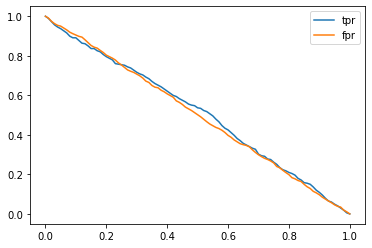

In [151]:
plt.plot(df_rand.threshold,df_rand['tpr'],label='tpr'),
plt.plot(df_rand.threshold,df_rand['fpr'],label='fpr')
plt.legend()

In [152]:
df_rand[::10]

,threshold,tp,tn,fn,fp,tpr,fpr
0,0.00,367,0,0,1042,1.000000,1.000000
10,0.08,330,84,37,958,0.899183,0.919386
20,0.16,307,163,60,879,0.836512,0.843570
30,0.24,278,246,89,796,0.757493,0.763916
40,0.33,254,342,113,700,0.692098,0.671785
50,0.41,224,418,143,624,0.610354,0.598848
60,0.49,201,508,166,534,0.547684,0.512476
70,0.57,171,592,196,450,0.465940,0.431862
80,0.65,131,677,236,365,0.356948,0.350288
90,0.73,102,755,265,287,0.277929,0.275432


# Ideal

In [153]:
num_neg=(y_val==0).sum()
num_pos=(y_val==1).sum()
num_neg,num_pos

(1042, 367)

In [154]:
y_ideal=np.repeat([0,1],[num_neg,num_pos])

In [155]:

y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [156]:
y_ideal_pred=np.linspace(0,1, len(y_val))

In [157]:
((y_ideal_pred>=0.74)==y_ideal).mean()

1.0

In [158]:
(1-y_val).mean()

0.7395315826827538

In [159]:
df_ideal=tpr_fpr_dataframe(y_ideal,y_ideal_pred)
df_ideal

,threshold,tp,tn,fn,fp,tpr,fpr
0,0.00,367,0,0,1042,1.000000,1.000000
1,0.01,367,15,0,1027,1.000000,0.985605
2,0.02,367,29,0,1013,1.000000,0.972169
3,0.02,367,29,0,1013,1.000000,0.972169
4,0.03,367,43,0,999,1.000000,0.958733
...,...,...,...,...,...,...,...
119,0.97,43,1042,324,0,0.117166,0.000000
120,0.98,29,1042,338,0,0.079019,0.000000
121,0.98,29,1042,338,0,0.079019,0.000000
122,0.99,15,1042,352,0,0.040872,0.000000


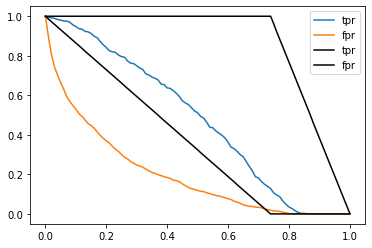

In [160]:
plt.plot(df.threshold,df['tpr'],label='tpr'),
plt.plot(df.threshold,df['fpr'],label='fpr')

plt.plot(df_ideal.threshold,df_ideal['tpr'],label='tpr',color='black'),
plt.plot(df_ideal.threshold,df_ideal['fpr'],label='fpr',color='black')

#plt.plot(df_rand.threshold,df_rand['tpr'],label='tpr'),
#plt.plot(df_rand.threshold,df_rand['fpr'],label='fpr')
plt.legend()

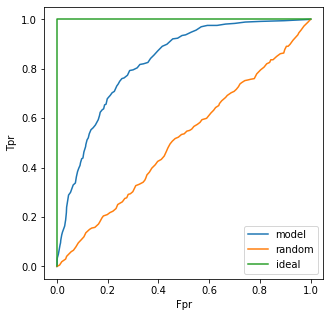

In [161]:
plt.figure(figsize=(5,5))
plt.plot(df['fpr'],df['tpr'],label='model'),
plt.plot(df_rand['fpr'],df_rand['tpr'],label='random'),
plt.plot(df_ideal['fpr'],df_ideal['tpr'],label='ideal'),

plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.legend()

([<matplotlib.lines.Line2D at 0x9fd2a78>],)

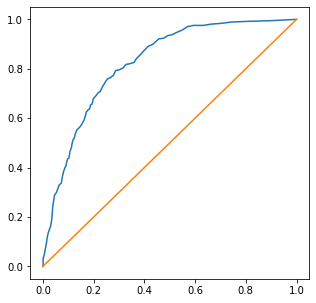

In [162]:

plt.figure(figsize=(5,5))
plt.plot(df['fpr'],df['tpr'],label='model'),
plt.plot([0,1],[0,1],label='random'),



In [163]:
#so the want tp makeour label coseto the north star

In [164]:
from sklearn.metrics import roc_curve

In [165]:
fpr,tpr,thresholds=roc_curve(y_val,y_pred_for_val)

([<matplotlib.lines.Line2D at 0xb12e640>],)

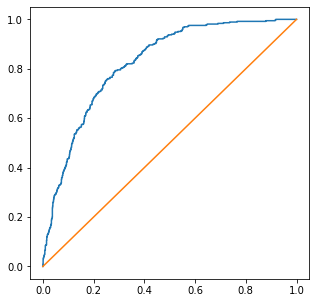

In [166]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label='model'),
plt.plot([0,1],[0,1],label='random'),


In [167]:
# thi sis howto use sckit learn to draw the roc curve

## Auc Aoc

In [168]:
# useful metricfor evaualtinh binaryclassification model
#y-tpr

In [169]:
from sklearn.metrics import auc

In [170]:
auc(fpr,tpr)

0.8229235854335877

In [171]:
y_pred_for_val[y_val==1]

array([0.44251221, 0.60283805, 0.5340088 , 0.53766372, 0.59108525,
       0.60191979, 0.72430076, 0.31663578, 0.19549451, 0.6749267 ,
       0.31521225, 0.27172142, 0.64796874, 0.41702048, 0.37166473,
       0.42151067, 0.39816794, 0.14839453, 0.44552799, 0.47408241,
       0.77579499, 0.37800514, 0.73724714, 0.57169799, 0.08858022,
       0.74937277, 0.14693846, 0.7567778 , 0.65575943, 0.29558642,
       0.62015537, 0.68441951, 0.45045498, 0.17207454, 0.77660177,
       0.70725412, 0.57454556, 0.79830436, 0.69958978, 0.77316137,
       0.07957165, 0.36383923, 0.80667525, 0.1605859 , 0.0926494 ,
       0.49842676, 0.24421037, 0.44284746, 0.0113184 , 0.22720932,
       0.66951317, 0.08822376, 0.75793044, 0.41534474, 0.03239989,
       0.59147553, 0.15015463, 0.34936365, 0.17649506, 0.41586127,
       0.00691637, 0.51703321, 0.27108761, 0.19182093, 0.5591955 ,
       0.77872639, 0.23066174, 0.24203353, 0.65911926, 0.48642935,
       0.74967936, 0.27121718, 0.18361384, 0.74500642, 0.20862

In [172]:
y_val

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
pos=y_pred_for_val[y_val==1]
neg=y_pred_for_val[y_val==0]

In [174]:
import random

In [175]:
pos_ind=random.randint(0, len(pos)-1)
neg_ind=random.randint(0, len(neg)-1)

In [176]:
n=100000
sucess=0
for i in range(n):
    pos_ind=random.randint(0, len(pos)-1)
    neg_ind=random.randint(0, len(neg)-1)
    
    if pos[pos_ind]>neg[neg_ind]:
        sucess=sucess+1
sucess/n   

0.82171

In [177]:
pos_ind=np.random.randint(0,len(pos),size=n)
neg_ind=np.random.randint(0,len(neg),size=n)

In [178]:
(pos[pos_ind]>neg[neg_ind]).mean()

0.82249

## Cross validation

In [179]:
df_full_train.churn

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int32

In [180]:
y_full_train

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int32

In [181]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [217]:
def train(df_train,y_train,c=c):
    train_dicts=df_train[categorical+numerical].to_dict(orient='record')
    
    dv=DictVectorizer(sparse=False)
    dv.fit(train_dicts)
    x_train=dv.transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(x_train,y_train)
    
    return dv,model

In [218]:
#this onejust trains the model
dv,model=train(df_train,y_train, c=c)

In [184]:
#this doesthe predictions
def predict(df,dv,model):
    dicts_train = df[categorical + numerical].to_dict(orient='records')
    x_train = dv.transform(dicts_train)

    y_pred_for_train = model.predict_proba(x_train)[:, 1]
    return y_pred_for_train

In [185]:
len(df_full_train)
5634-564

5070

In [186]:
y_pred_for_val=predict(df_val,dv,model)
y_pred_for_val

array([0.04765789, 0.29730559, 0.01425349, ..., 0.15178374, 0.17402521,
       0.01902528])

## k_fold vaidation

In [187]:
from sklearn.model_selection import KFold

In [188]:
kfold=KFold(n_splits=10, shuffle=True, random_state=1)

In [189]:
kfold

KFold(n_splits=10, random_state=1, shuffle=True)

In [190]:
len(df_full_train)

5634

In [ ]:
#this takes one tenth of the full train as a val data sets and the otheras train data set

In [191]:
train_idx,val_idx=next(kfold.split(df_full_train))
len(val_idx),len(train_idx)

(564, 5070)

In [192]:
from sklearn.metrics import roc_auc_score
#Z

In [193]:
!pip install tqdm

In [194]:
from tqdm.auto import tqdm

In [219]:
#befor tuning our model with the variation of c we have to include the c in our initial function in code cell 217&218
n_splits=5
for c in tqdm([0.002,0.001,0.1,0.01,0.5,1,5,10]):
    scores=[]
    kfold=KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]

        y_train=df_train.churn.values
        y_val=df_val.churn.values

        dv,model=train(df_train,y_train,c=c)
        y_pred_for_val=predict(df_val,dv,model)

        auc=roc_auc_score(y_val,y_pred_for_val)
        scores.append(auc)
    print('c=%s %3f +- %.3f'%(c, np.mean(scores),np.std(scores)))
#parameter tuning
# initially it was ike this 

''''scores=[]

for train_idx,val_idx in tqdm(kfold.split(df_full_train)):
    df_train=df_full_train.iloc[train_idx]
    df_val=df_full_train.iloc[val_idx]
    
    y_train=df_train.churn.values
    y_val=df_val.churn.values
    
    dv,model=train(df_train,y_train)
    y_pred_for_val=predict(df_val,dv,model)
    
    auc=roc_auc_score(y_val,y_pred_for_val)
    scores.append(auc) '''
    
#logisticsregression has a parameter c so weuse the default c=c
#then on our function arguement c=1.0max iter=1000 will refutethe error hekept gettinh
#then on our dv model function we also add our c parameters the we can looop over a tye values of c and the prent c,
#sowe know the iteratios and the c levelon each iteration

  0%|          | 0/8 [00:00<?, ?it/s]

c=0.002 0.831468 +- 0.012
c=0.001 0.824708 +- 0.013
c=0.1 0.840720 +- 0.008
c=0.01 0.839016 +- 0.009
c=0.5 0.841016 +- 0.008
c=1 0.840997 +- 0.008
c=5 0.840957 +- 0.008
c=10 0.840836 +- 0.008


"'scores=[]\n\nfor train_idx,val_idx in tqdm(kfold.split(df_full_train)):\n    df_train=df_full_train.iloc[train_idx]\n    df_val=df_full_train.iloc[val_idx]\n    \n    y_train=df_train.churn.values\n    y_val=df_val.churn.values\n    \n    dv,model=train(df_train,y_train)\n    y_pred_for_val=predict(df_val,dv,model)\n    \n    auc=roc_auc_score(y_val,y_pred_for_val)\n    scores.append(auc) "

In [221]:
#so we train our final model on the full train dataset and evaluate on our 

dv,model=train(df_full_train,df_full_train.churn.values,c=c)
y_pred_for_test=predict(df_test,dv,model)

auc=roc_auc_score(y_test,y_pred_for_test)
auc

0.8580646646516517

In [220]:
scores

[0.8422612272452527,
 0.8460199807972455,
 0.8327654023680515,
 0.8316033286436018,
 0.8515303881271377]

In [198]:
#this gives us the asvg score on all folds
np.mean(scores),np.std(scores)

(0.842175184482161, 0.01157930535988192)

In [199]:
len(df_train)

5071

In [200]:
df_train=df_full_train.iloc[train_idx]
df_val=df_full_train.iloc[val_idx]

In [201]:
df_val

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
14,0330-bgyze,male,0,yes,no,60,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,no,bank_transfer_(automatic),102.50,6157.60,0
15,1814-wfgvs,male,0,yes,yes,72,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,mailed_check,48.90,3527.00,0
20,4884-zthvf,female,1,no,no,8,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,87.10,713.60,0
42,3766-ejlfl,female,0,yes,yes,68,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,bank_transfer_(automatic),109.05,7508.55,0
52,0411-ezjze,female,0,no,no,3,yes,yes,dsl,no,...,no,no,yes,no,month-to-month,yes,electronic_check,60.25,170.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5606,0640-yjtpy,male,0,yes,yes,72,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,bank_transfer_(automatic),21.00,1493.75,0
5608,0268-qkiwo,female,0,no,no,3,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,electronic_check,19.75,58.85,1
5614,9514-jdski,male,1,yes,no,1,no,no_phone_service,dsl,no,...,no,no,yes,no,month-to-month,no,electronic_check,40.20,40.20,1
5617,1455-ugqvh,male,0,yes,no,10,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,98.50,1037.75,1


In [202]:
def train(df_train,y_train):
    train_dicts=df_train[categorical+numerical].to_dict(orient='record')
    
    dv=DictVectorizer(sparse=False)
    dv.fit(train_dicts)
    x_train=dv.transform(train_dicts)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(x_train,y_train)
    
    return dv,model

In [203]:
dv,model=train(df_train)

TypeError: train() missing 1 required positional argument: 'y_train'

In [222]:
#summary 
evauating across different threshod
accuracy is not the best metrics
confusion table categorise erroors

#Aucdescribes howclosewe are to the idealcurve remember the graph at auc 
this tels us what is the prob that a randomly selectedpostive example has higjher scoree than a randomly selcted negativeexamplw

SyntaxError: invalid syntax (<ipython-input-222-45ee4c3c5923>, line 2)